
## Aprendizaje Supervisado - Clasificación


Diabetes dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
import os
import pandas as pd
import numpy as np
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

## dataset

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes['Outcome']

In [6]:
diabetes['Outcome'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## exploración

In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Insulin', ylabel='Count'>

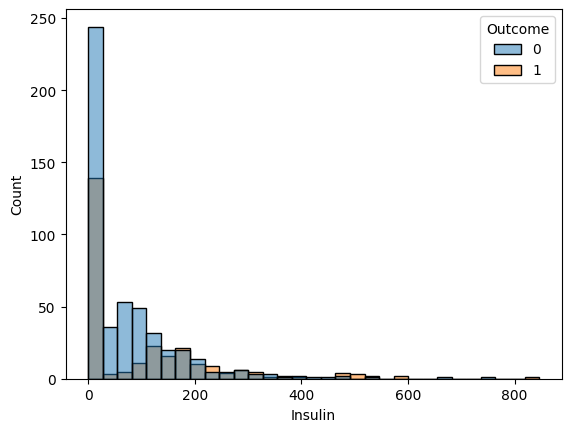

In [9]:
sns.histplot(data = diabetes, x = 'Insulin', hue = 'Outcome')

<Axes: xlabel='Glucose', ylabel='Count'>

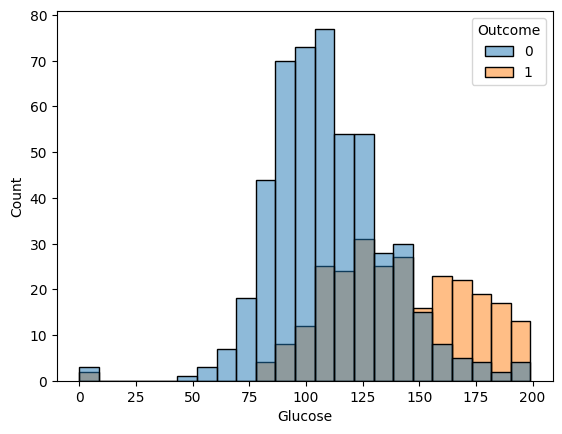

In [10]:
sns.histplot(data = diabetes, x = 'Glucose', hue = 'Outcome')

In [11]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## train y test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
X = diabetes.drop('Outcome',  axis= 1)
y = diabetes['Outcome']

In [15]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
y[:5]

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2020)

In [18]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [19]:
y_train.shape, y_test.shape

((614,), (154,))

In [20]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
452,0,91,68,32,210,39.9,0.381,25
561,0,198,66,32,274,41.3,0.502,28
609,1,111,62,13,182,24.0,0.138,23
668,6,98,58,33,190,34.0,0.430,43
520,2,68,70,32,66,25.0,0.187,25


In [21]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
337,5,115,76,0,0,31.2,0.343,44
357,13,129,0,30,0,39.9,0.569,44
748,3,187,70,22,200,36.4,0.408,36
131,9,122,56,0,0,33.3,1.114,33
330,8,118,72,19,0,23.1,1.476,46


## Árboles de decisión

Con parámetros por defecto

Documentación https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt = DecisionTreeClassifier()

In [24]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [26]:
y_test_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

Matriz de confusión

In [28]:
confusion_matrix(y_train, y_train_pred)

array([[407,   0],
       [  0, 207]])

In [29]:
confusion_matrix(y_test, y_test_pred)

array([[79, 14],
       [23, 38]])

In [30]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       1.00      1.00      1.00       207

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [31]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        93
           1       0.73      0.62      0.67        61

    accuracy                           0.76       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [32]:
from sklearn.tree import plot_tree

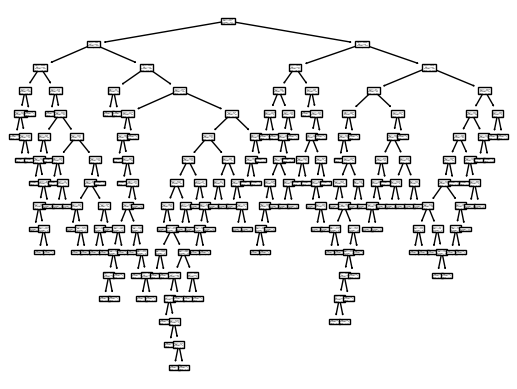

In [33]:
_ = plot_tree(dt)

In [34]:
plt.figure(figsize=(200,40))

_ = plot_tree(dt, fontsize= 10, feature_names = X_train.columns, rounded = True, filled = True)

Output hidden; open in https://colab.research.google.com to view.

### parámetros

Profundidad

In [35]:
dt = DecisionTreeClassifier(max_depth= 4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [36]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [37]:
confusion_matrix(y_test, y_test_pred)

array([[75, 18],
       [22, 39]])

In [38]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       407
           1       0.69      0.76      0.73       207

    accuracy                           0.81       614
   macro avg       0.78      0.80      0.79       614
weighted avg       0.81      0.81      0.81       614



In [39]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        93
           1       0.68      0.64      0.66        61

    accuracy                           0.74       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.74      0.74      0.74       154



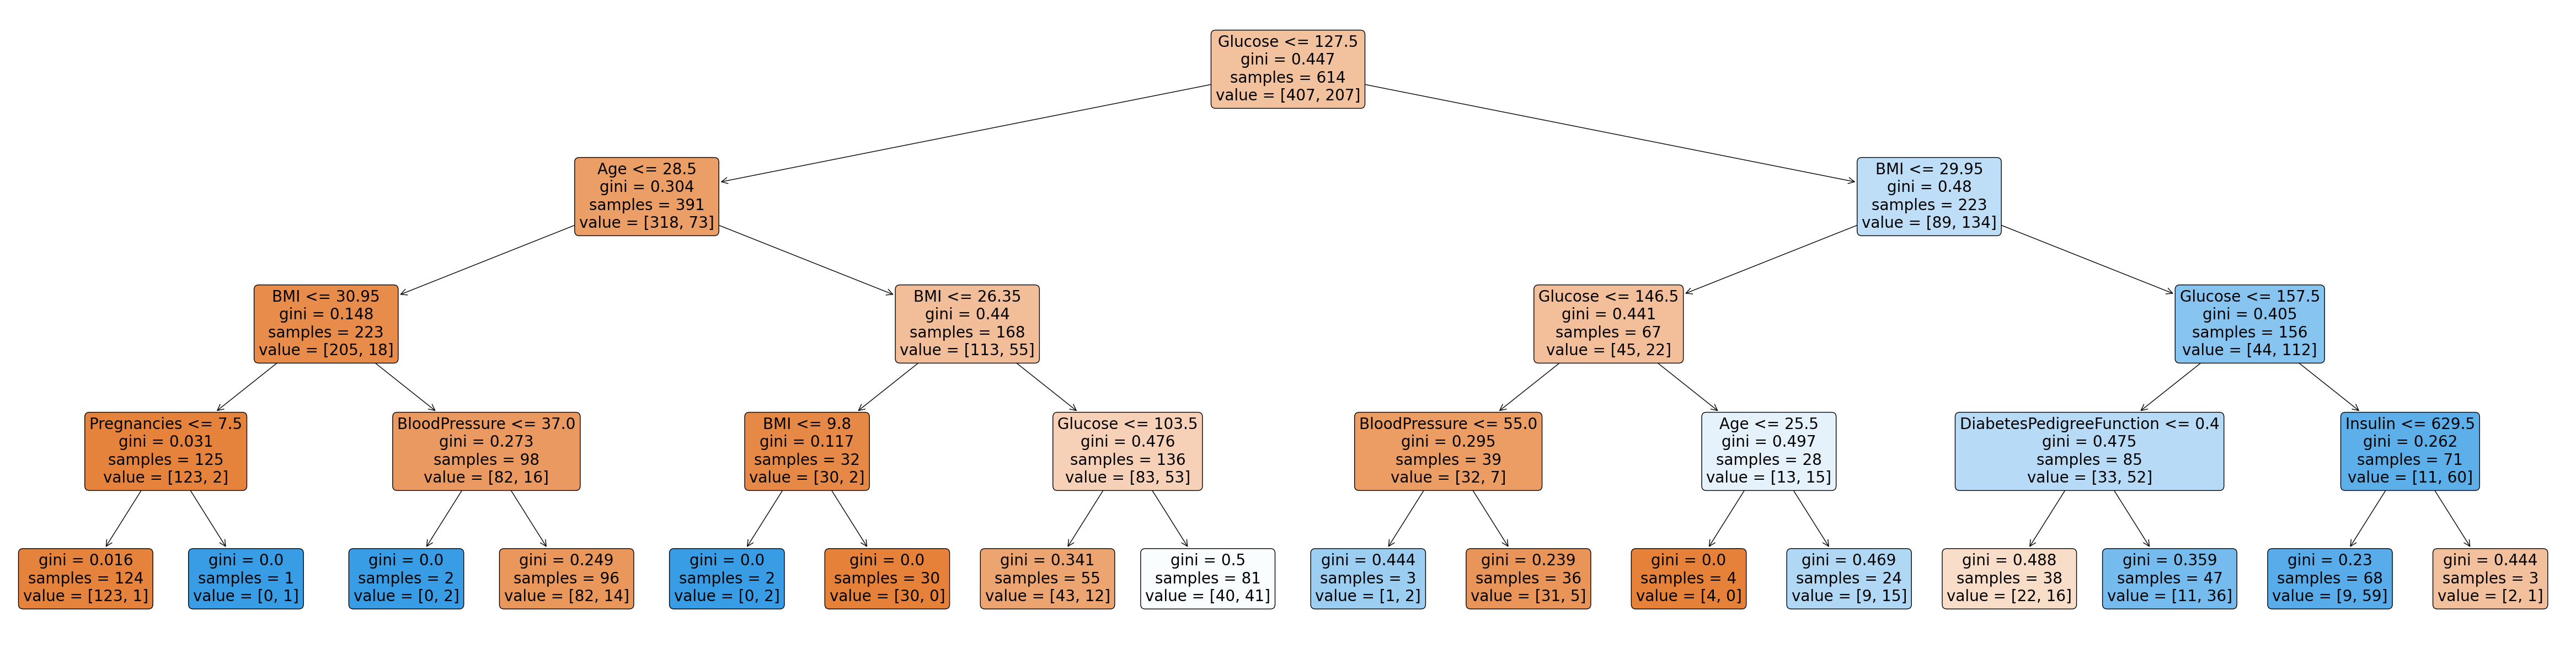

In [40]:
plt.figure(figsize=(60,15))

_ = plot_tree(dt, fontsize= 20, feature_names = X_train.columns, rounded = True, filled = True)

Mínimo de muestras para split

In [62]:
dt = DecisionTreeClassifier(min_samples_split= 100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=100)

In [63]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [64]:
y_test_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [65]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       407
           1       0.65      0.74      0.69       207

    accuracy                           0.78       614
   macro avg       0.75      0.77      0.76       614
weighted avg       0.79      0.78      0.78       614



In [66]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        93
           1       0.70      0.79      0.74        61

    accuracy                           0.78       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.78      0.78       154



In [67]:
confusion_matrix(y_test, y_test_pred)

array([[72, 21],
       [13, 48]])

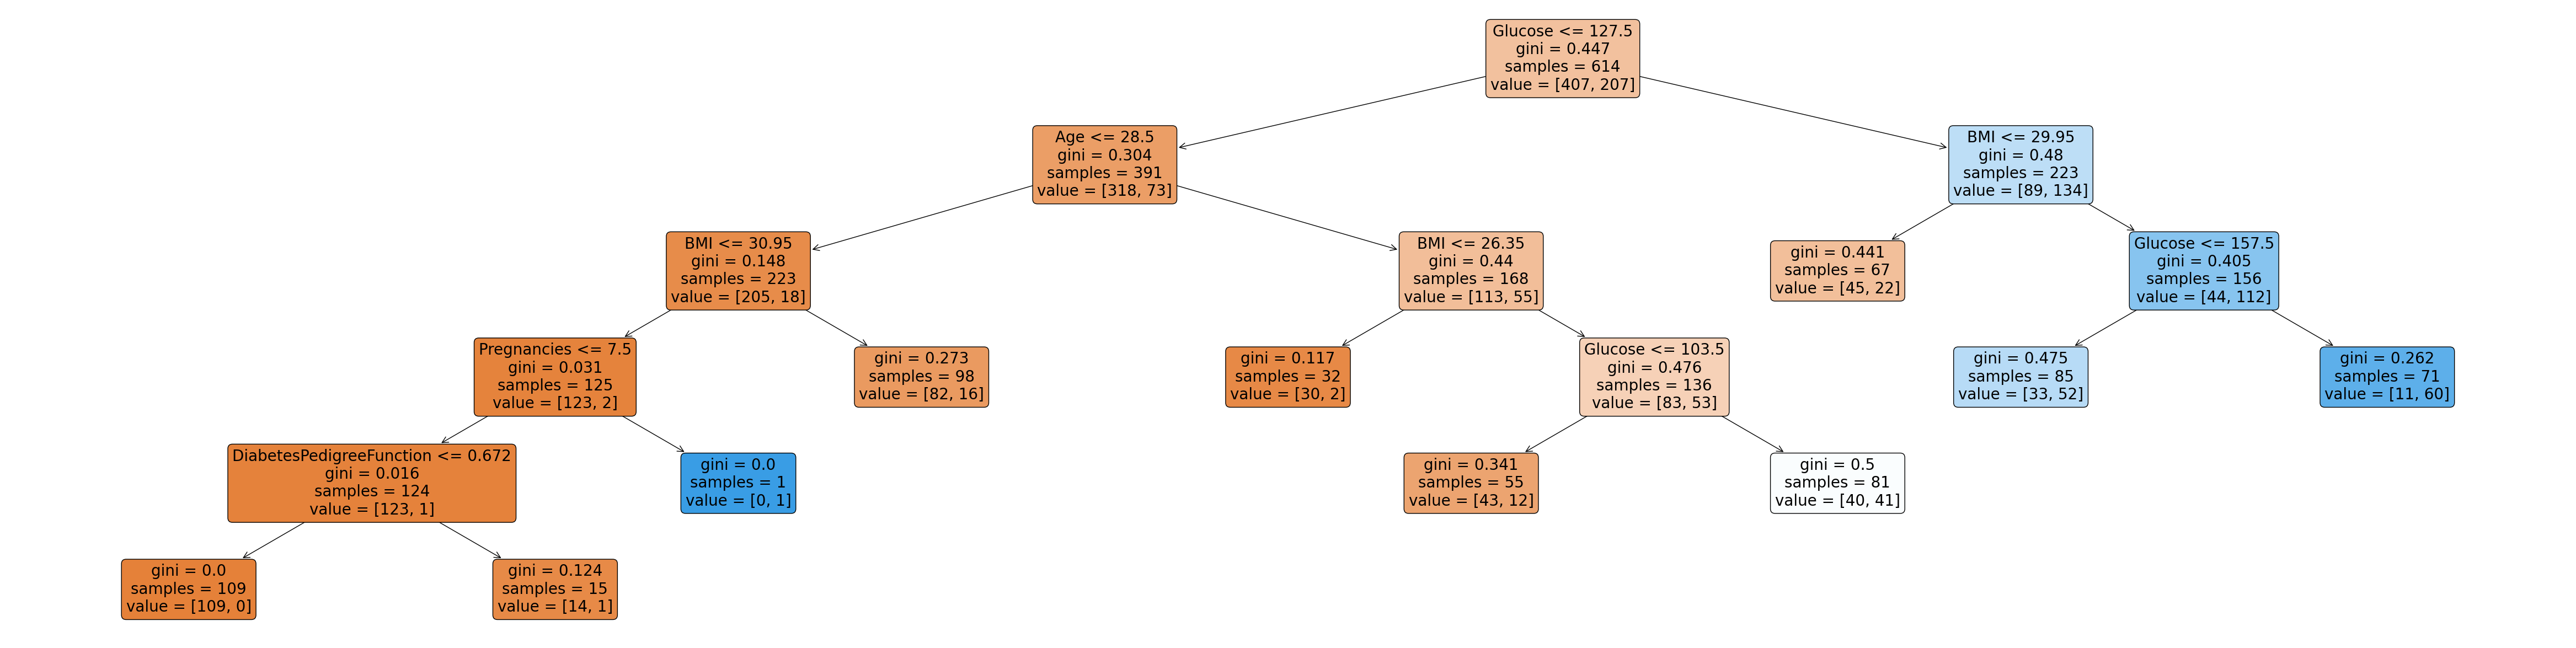

In [68]:
plt.figure(figsize=(60,15))

_ = plot_tree(dt, fontsize= 20, feature_names = X_train.columns, rounded = True, filled = True)

## Regresión Logística

In [69]:
from sklearn.linear_model import LogisticRegression

Cargamos `metrics` del **sklearn** para obtener las princiaples métricas de evaluación del modelo

In [70]:
from sklearn import metrics

In [71]:
estimador_logis = LogisticRegression() # Definir el algoritmo o modelo
estimador_logis.fit(X_train, y_train) # Entrenar el modelo / Ajustar el modelo a los datos

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
predicciones = estimador_logis.predict(X_test)

predicciones[:10]

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [73]:
predicciones_probabilidades = estimador_logis.predict_proba(X_test)
predicciones_probabilidades[:10]

array([[0.69576623, 0.30423377],
       [0.07133069, 0.92866931],
       [0.23832309, 0.76167691],
       [0.23269948, 0.76730052],
       [0.44792941, 0.55207059],
       [0.89514239, 0.10485761],
       [0.93907368, 0.06092632],
       [0.319462  , 0.680538  ],
       [0.70653819, 0.29346181],
       [0.97414805, 0.02585195]])

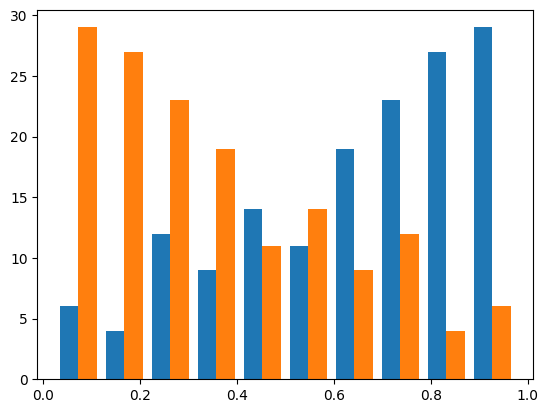

In [74]:
plt.hist(predicciones_probabilidades);

In [75]:
probs_df = pd.DataFrame(predicciones_probabilidades)

In [76]:
probs_df

,0,1
0,0.695766,0.304234
1,0.071331,0.928669
2,0.238323,0.761677
3,0.232699,0.767301
4,0.447929,0.552071
...,...,...
149,0.966546,0.033454
150,0.534839,0.465161
151,0.542762,0.457238
152,0.878066,0.121934


In [77]:
df_resultados = X_test.reset_index().copy()
df_resultados["objetivo"] = y_test.tolist()
df_resultados["prediccion"] = predicciones
df_resultados = pd.concat([df_resultados, probs_df], axis=1)
df_resultados[["objetivo", "prediccion", 0, 1]].head(10)

,objetivo,prediccion,0,1
0,1,0,0.695766,0.304234
1,1,1,0.071331,0.928669
2,1,1,0.238323,0.761677
3,1,1,0.232699,0.767301
4,0,1,0.447929,0.552071
5,0,0,0.895142,0.104858
6,0,0,0.939074,0.060926
7,1,1,0.319462,0.680538
8,0,0,0.706538,0.293462
9,0,0,0.974148,0.025852


In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicciones)

array([[83, 10],
       [26, 35]])

In [79]:
df = pd.DataFrame({"clase_real":y_test,
                   "clase_pred": predicciones,
                   "probabilidades_0":estimador_logis.predict_proba(X_test)[:,0],
                    "probabilidades_1":estimador_logis.predict_proba(X_test)[:,1],
                  })
df["sum_probas"] = df.probabilidades_0 + df.probabilidades_1

In [80]:
df.sample(10)
#df.head(10)

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas
194,0,0,0.864872,0.135128,1.0
236,1,1,0.170251,0.829749,1.0
60,0,0,0.962863,0.037137,1.0
700,0,0,0.748606,0.251394,1.0
596,0,0,0.893211,0.106789,1.0
35,0,0,0.806685,0.193315,1.0
213,1,0,0.550029,0.449971,1.0
356,1,0,0.617028,0.382972,1.0
672,0,0,0.885046,0.114954,1.0
252,0,0,0.950707,0.049293,1.0


In [81]:
df.query("probabilidades_1>0.4 & clase_pred==0").head(10)

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas
582,0,0,0.541581,0.458419,1.0
213,1,0,0.550029,0.449971,1.0
388,1,0,0.560683,0.439317,1.0
107,0,0,0.599801,0.400199,1.0
115,1,0,0.500355,0.499645,1.0
638,1,0,0.576253,0.423747,1.0
470,0,0,0.546091,0.453909,1.0
395,0,0,0.508305,0.491695,1.0
153,0,0,0.552459,0.447541,1.0
746,1,0,0.505901,0.494099,1.0


In [82]:
df.query("probabilidades_1<=0.55 & clase_pred==1")

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas
753,1,1,0.486725,0.513275,1.0
635,1,1,0.463269,0.536731,1.0
437,0,1,0.489785,0.510215,1.0
618,1,1,0.468719,0.531281,1.0
110,1,1,0.487462,0.512538,1.0
298,1,1,0.482395,0.517605,1.0
28,0,1,0.453402,0.546598,1.0
231,1,1,0.460546,0.539454,1.0
655,1,1,0.490024,0.509976,1.0
517,0,1,0.490556,0.509444,1.0


In [83]:
def probabilidades_a_clases(predicciones_probabilidades, umbral=0.5):
    predicciones = np.zeros([len(predicciones_probabilidades), ])
    predicciones[predicciones_probabilidades[:,1]>=umbral] = 1
    return predicciones

In [84]:
predicciones_probabilidades[:10]

array([[0.69576623, 0.30423377],
       [0.07133069, 0.92866931],
       [0.23832309, 0.76167691],
       [0.23269948, 0.76730052],
       [0.44792941, 0.55207059],
       [0.89514239, 0.10485761],
       [0.93907368, 0.06092632],
       [0.319462  , 0.680538  ],
       [0.70653819, 0.29346181],
       [0.97414805, 0.02585195]])

In [85]:
probabilidades_a_clases(predicciones_probabilidades, umbral=0.40)[:10]

array([0., 1., 1., 1., 1., 0., 0., 1., 0., 0.])

In [86]:
pred_1 = probabilidades_a_clases(predicciones_probabilidades, umbral=0.70)
confusion_matrix(y_test, pred_1)

array([[91,  2],
       [42, 19]])

In [87]:
predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, 0.35)

In [89]:
sensibilidad_umbral = metrics.recall_score(y_test, predicciones_en_umbral)
sensibilidad_umbral

0.7540983606557377

In [ ]:
precision_umbral = metrics.average_precision_score(y_test, predicciones_en_umbral)
precision_umbral

0.6001348378397557

In [ ]:
from ipywidgets import widgets, fixed, interact
@interact(umbral=widgets.FloatSlider(min=0.001, max=0.999, step=0.001, value=0.001))
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    sensibilidad_umbral = metrics.recall_score(y_test, predicciones_en_umbral)
    precision_umbral = metrics.average_precision_score(y_test, predicciones_en_umbral)
    exactitud_umbral = metrics.accuracy_score(y_test, predicciones_en_umbral)
    roc_auc = metrics.roc_auc_score(y_test, predicciones_en_umbral)
    mc_umbral = confusion_matrix(y_test, predicciones_en_umbral)
    print( """
    Precision: {:.3f}
    Sensibilidad:{:.3f}
    Exacitud:{:.3f}
    Area_ROC:{:.3F}
    """.format(
        precision_umbral,
        sensibilidad_umbral,
        exactitud_umbral,
        roc_auc
    ))
    print("Matriz de confusión")
    print(mc_umbral)

interactive(children=(FloatSlider(value=0.001, description='umbral', max=0.999, min=0.001, step=0.001), Output…

In [ ]:
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    precision_umbral =  metrics.average_precision_score(y_test, predicciones_en_umbral)
    sensibilidad_umbral = metrics.recall_score(y_test, predicciones_en_umbral)
    return precision_umbral, sensibilidad_umbral


rango_umbral = np.linspace(0., 1., 1000)
sensibilidad_umbrales = []
precision_umbrales = []

for umbral in rango_umbral:
    precision_umbral, sensibilidad_umbral = evaluar_umbral(umbral)
    precision_umbrales.append(precision_umbral)
    sensibilidad_umbrales.append(sensibilidad_umbral)

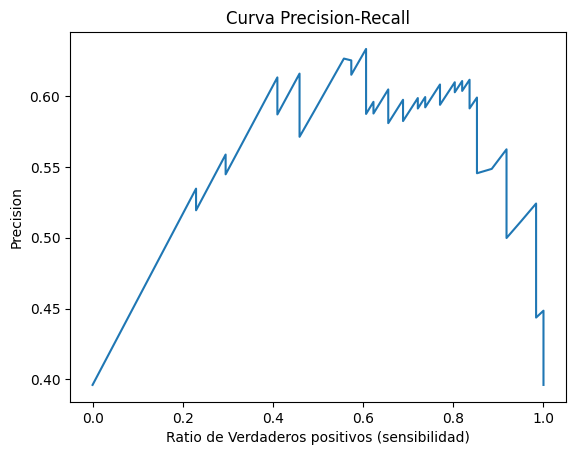

In [ ]:
plt.plot(sensibilidad_umbrales, precision_umbrales);
plt.ylabel("Precision")
plt.xlabel("Ratio de Verdaderos positivos (sensibilidad)")
plt.title("Curva Precision-Recall");

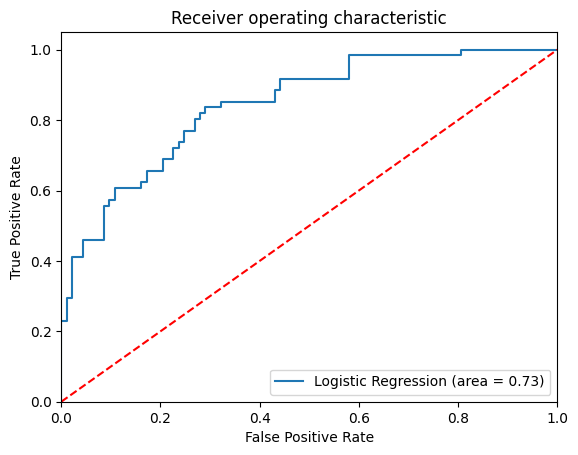

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, estimador_logis.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, estimador_logis.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
2*0.73-1

0.45999999999999996

In [ ]:
def evaluar_modelo(clases_reales, predicciones, probabilidades):
    exactitud = metrics.accuracy_score(clases_reales, predicciones)
    precision = metrics.average_precision_score(clases_reales, predicciones)
    sensibilidad = metrics.recall_score(clases_reales, predicciones)
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    f1 = metrics.f1_score(clases_reales, predicciones)
    print("""
    Exactitud: {:.3f}
    Precisión: {:.3f}
    Sensibilidad: {:.3f}
    Area bajo curva (AUC): {:.3f}
    Puntuación F1: {:.3f}
    """.format(
        exactitud,
        precision,
        sensibilidad,
        roc_auc,
        f1
    ))

evaluar_modelo(y_test, predicciones, predicciones_probabilidades)


    Exactitud: 0.766
    Precisión: 0.615
    Sensibilidad: 0.574
    Area bajo curva (AUC): 0.733
    Puntuación F1: 0.660
    


In [ ]:
def tupla_clase_prediccion(y_real, y_pred):
    return list(zip(y_real, y_pred))

tupla_clase_prediccion(y_test, predicciones)[:10]

[(1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0)]